## Useful code for processing test data

### Imports

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

### Time test

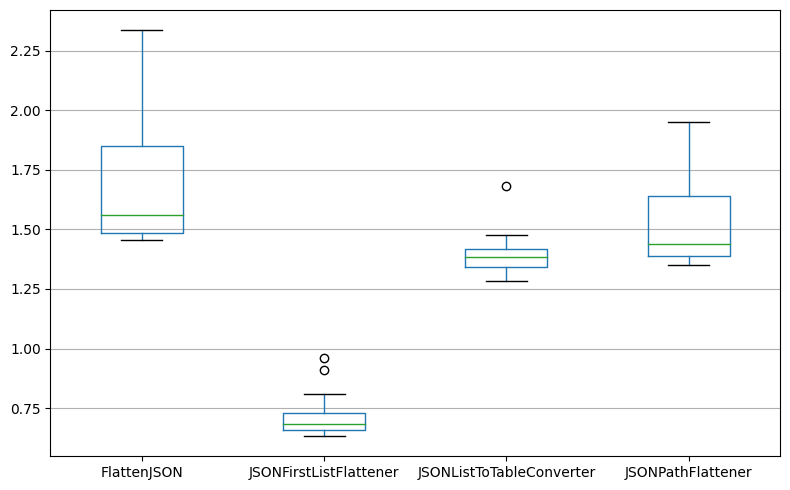

In [82]:
files = [
    ("time/FlattenJSON.txt", "FlattenJSON"),
    ("time/JSONFirstListFlattener.txt", "JSONFirstListFlattener"),
    ("time/JSONListToTableConverter.txt", "JSONListToTableConverter"),
    ("time/JSONPathFlattener.txt", "JSONPathFlattener")
]

df_time_duration = pd.DataFrame()

for file, plot_name in files:
    df = pd.read_csv(file, header=None)
    df_time_duration[plot_name] = df.iloc[:, 0]

axes = df_time_duration.boxplot(figsize=(8,5), grid=False)
axes.grid(axis='y')
plt.tight_layout()
plt.show()

### CPU and Memory Usage

In [83]:
files = [
    ("cpu-memory/example_1.txt", "example_1"),
    ("cpu-memory/example_2.txt", "example_2"),
    ("cpu-memory/example_3.txt", "example_3"),
    ("cpu-memory/example_4.txt", "example_4")
]

df_memory_usage = pd.DataFrame()
df_cpu_usage = pd.DataFrame()

for (file, plot_name) in files:
    df = pd.read_csv(file, sep=";")
    df_memory_usage[plot_name] = df.iloc[:, 0]
    df_cpu_usage[plot_name] = df.iloc[:, 1]


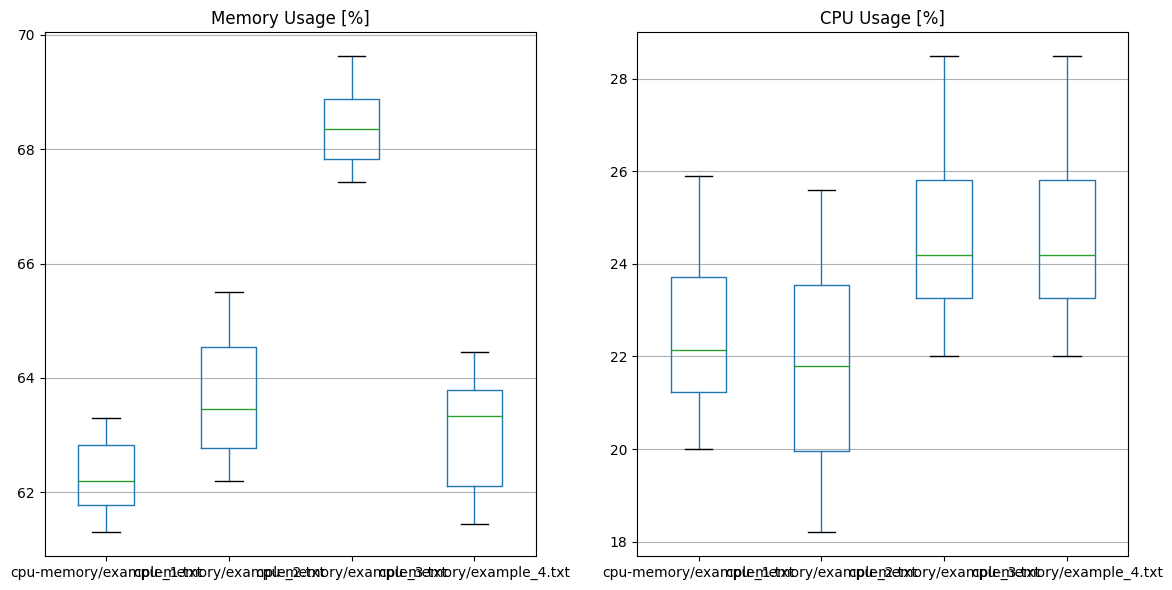

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
final_plots = [
    (df_memory_usage, ax1, "Memory Usage [%]"),
    (df_cpu_usage, ax2, "CPU Usage [%]")
]

for (final_df, sub_ax, title) in final_plots:
    final_df.boxplot(ax=sub_ax, grid=False)
    sub_ax.grid(axis='y')
    sub_ax.set_title(title)

plt.tight_layout()
plt.show()